5.1.1: Introduction to Statistical Learning

In [1]:
'''
Statistical learning -
    unsupervised
        techniques and algorithm - inputs only
    supervised 
        input output example given
        Types - 
            Regression - continuous output
            Classification - Categorical outputs - 0/1, Blue/Green
        scikitlearn library
        variables
            quantitative - take numerical values - income
                - Range depends on what they measure - $, $ k
            qualitative - take variables incategory - M/F
                - have categories - M/L , colors any number
            in some cases we convert continuous variable into categorical variable by specifying cutoff point
                -Income - low income household, high income household
        Outcome -
            quantitative - output : Regression
            qualitative - output : classification
          
        prediction - 
            input - X 
            output - y
            function - f(X) predict y on given values X
            best prediction depends on Loss function 
                - how far prediction from y from given value of X are true absurd value of y            
            Regression: Least Square loss (estimate expected value)
                - best value for given X is 
                    -conditional avg of y given X
                    - avg of all values of y given X
            Classification - 0-1 loss function (estimate probablity)
                - classifying observation to class is high conditional probability given X
                - for given value of X we calculate probability of each class then assign observation to class with high pobability
                
        Regression - X, y - mean of values of x on the line / avg of neighboring x if x are not present on line
            f(X) conditional expectation of y given specific value for X
        Classification - X, y - y: 0,1 - separate observation of 0 from 1 - 
            p(y = 0 | X=x)
            p(y = 1 | X=x)
            probability largest - prediction for X
        
'''

'\nStatistical learning -\n    unsupervised\n        techniques and algorithm - inputs only\n    supervised \n        input output example given\n        Types - \n            Regression - continuous output\n            Classification - Categorical outputs - 0/1, Blue/Green\n        scikitlearn library\n        variables\n            quantitative - take numerical values - income\n                - Range depends on what they measure - $, $ k\n            qualitative - take variables incategory - M/F\n                - have categories - M/L , colors any number\n            in some cases we convert continuous variable into categorical variable by specifying cutoff point\n                -Income - low income household, high income household\n        Outcome -\n            quantitative - output : Regression\n            qualitative - output : classification\n          \n        prediction - \n            input - X \n            output - y\n            function - f(X) predict y on given valu

5.1.2. Generating Example Regression Data

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [3]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)

In [9]:
ss.uniform.rvs(size=n)

array([0.24803356, 0.85167187, 0.41584872, 0.61668507, 0.23366614,
       0.10196726, 0.51585702, 0.47714099, 0.15267164, 0.62180623,
       0.54401012, 0.65413735, 0.14454554, 0.75152782, 0.22204914,
       0.51935182, 0.78529603, 0.02233043, 0.32436246, 0.87292238,
       0.84470961, 0.53844059, 0.86660827, 0.94980599, 0.826407  ,
       0.85411544, 0.0987434 , 0.65130433, 0.70351699, 0.61024081,
       0.79961526, 0.03457122, 0.77023873, 0.7317286 , 0.25969839,
       0.2570693 , 0.63230332, 0.34529746, 0.79658868, 0.44614623,
       0.78274941, 0.99047178, 0.30024834, 0.14300583, 0.90130844,
       0.54155938, 0.97474037, 0.6366044 , 0.99391302, 0.5460708 ,
       0.52642593, 0.1354279 , 0.35570517, 0.02621857, 0.16039518,
       0.74563719, 0.03039969, 0.3665431 , 0.86234625, 0.69267772,
       0.69094214, 0.1886368 , 0.44190428, 0.58157741, 0.98975171,
       0.20390623, 0.2477329 , 0.26217308, 0.75017241, 0.45697533,
       0.05692944, 0.50851624, 0.21196016, 0.79860424, 0.29733

In [6]:
X = 10 * ss.uniform.rvs(size=n) #generate random variables

In [10]:
X #random values between 0,10

array([3.26644902, 5.27058102, 8.85942099, 3.5726976 , 9.08535151,
       6.23360116, 0.15821243, 9.29437234, 6.90896918, 9.9732285 ,
       1.72340508, 1.3713575 , 9.32595463, 6.96818161, 0.66000173,
       7.55463053, 7.53876188, 9.23024536, 7.11524759, 1.24270962,
       0.19880134, 0.26210987, 0.28306488, 2.46211068, 8.60027949,
       5.38831064, 5.52821979, 8.42030892, 1.24173315, 2.79183679,
       5.85759271, 9.69595748, 5.61030219, 0.18647289, 8.00632673,
       2.32974274, 8.07105196, 3.87860644, 8.63541855, 7.47121643,
       5.56240234, 1.36455226, 0.5991769 , 1.21343456, 0.44551879,
       1.07494129, 2.25709339, 7.1298898 , 5.59716982, 0.1255598 ,
       0.7197428 , 9.6727633 , 5.68100462, 2.03293235, 2.52325745,
       7.43825854, 1.95429481, 5.81358927, 9.70019989, 8.46828801,
       2.39847759, 4.93769714, 6.19955718, 8.289809  , 1.56791395,
       0.18576202, 0.70022144, 4.86345111, 6.06329462, 5.68851437,
       3.17362409, 9.88616154, 5.79745219, 3.80141173, 5.50948

In [7]:
y = beta_0 + beta_1 * X + ss.norm.rvs(loc=0, scale=1, size=n) #generating actual data + noise

In [11]:
y

array([11.61071916, 16.15954231, 22.95133655, 12.82794661, 22.86058624,
       15.03236455,  6.35524946, 25.77572432, 19.25930279, 24.84630178,
        8.31036542,  7.6236608 , 23.66931867, 17.8143445 ,  5.802909  ,
       19.11223422, 20.32632293, 23.16384956, 19.7257065 ,  7.31071608,
        6.38393786,  5.73775364,  7.75682949,  8.02786043, 21.55364229,
       16.67810818, 18.58476528, 21.59198307,  7.5271353 , 10.35735934,
       18.04664254, 24.1046071 , 16.90067422,  5.05314419, 19.7400947 ,
        9.9730332 , 21.64528873, 14.05043876, 22.16039006, 19.32507079,
       16.68756578,  7.96984161,  6.47901887,  7.35375641,  7.05137614,
        7.5193753 , 11.41884548, 20.37083631, 16.85338944,  3.62368126,
        7.04180487, 24.7658088 , 17.17296091, 10.11030679,  9.6456367 ,
       20.7005227 ,  8.34628419, 18.58205662, 23.06844812, 20.17588747,
        8.14623392, 13.9848387 , 16.27999897, 23.53569689,  7.80932839,
        4.02884825,  7.51482585, 14.14037828, 15.88973586, 17.25

In [12]:
beta_0 + beta_1 * X 

array([11.53289804, 15.54116205, 22.71884199, 12.1453952 , 23.17070302,
       17.46720232,  5.31642486, 23.58874467, 18.81793835, 24.94645701,
        8.44681017,  7.74271499, 23.65190926, 18.93636323,  6.32000345,
       20.10926105, 20.07752377, 23.46049071, 19.23049517,  7.48541924,
        5.39760268,  5.52421974,  5.56612976,  9.92422135, 22.20055897,
       15.77662129, 16.05643957, 21.84061785,  7.4834663 , 10.58367358,
       16.71518543, 24.39191497, 16.22060439,  5.37294579, 21.01265345,
        9.65948548, 21.14210391, 12.75721288, 22.27083709, 19.94243285,
       16.12480468,  7.72910451,  6.19835379,  7.42686911,  5.89103757,
        7.14988258,  9.51418677, 19.25977961, 16.19433964,  5.2511196 ,
        6.43948559, 24.3455266 , 16.36200924,  9.06586469, 10.04651489,
       19.87651708,  8.90858962, 16.62717855, 24.40039978, 21.93657603,
        9.79695518, 14.87539429, 17.39911437, 21.57961799,  8.13582789,
        5.37152404,  6.40044287, 14.72690222, 17.12658923, 16.37

Text(0,0.5,'y')

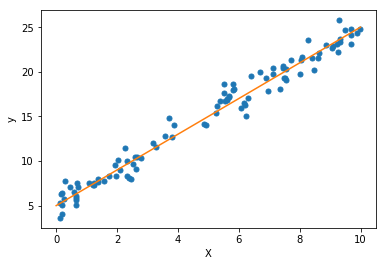

In [8]:
plt.figure()
plt.plot(X,y,"o", ms=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx) # deterministic model - doesnt involve error
plt.xlabel("X")
plt.ylabel("y")

In [13]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

In [14]:
np.mean(x)

4.8587792760014565

In [15]:
np.mean(y)

14.80142786070299